## CHAPTER 1: BUILDING NEURAL NETWORK FOR LINEAR REGRESSION 

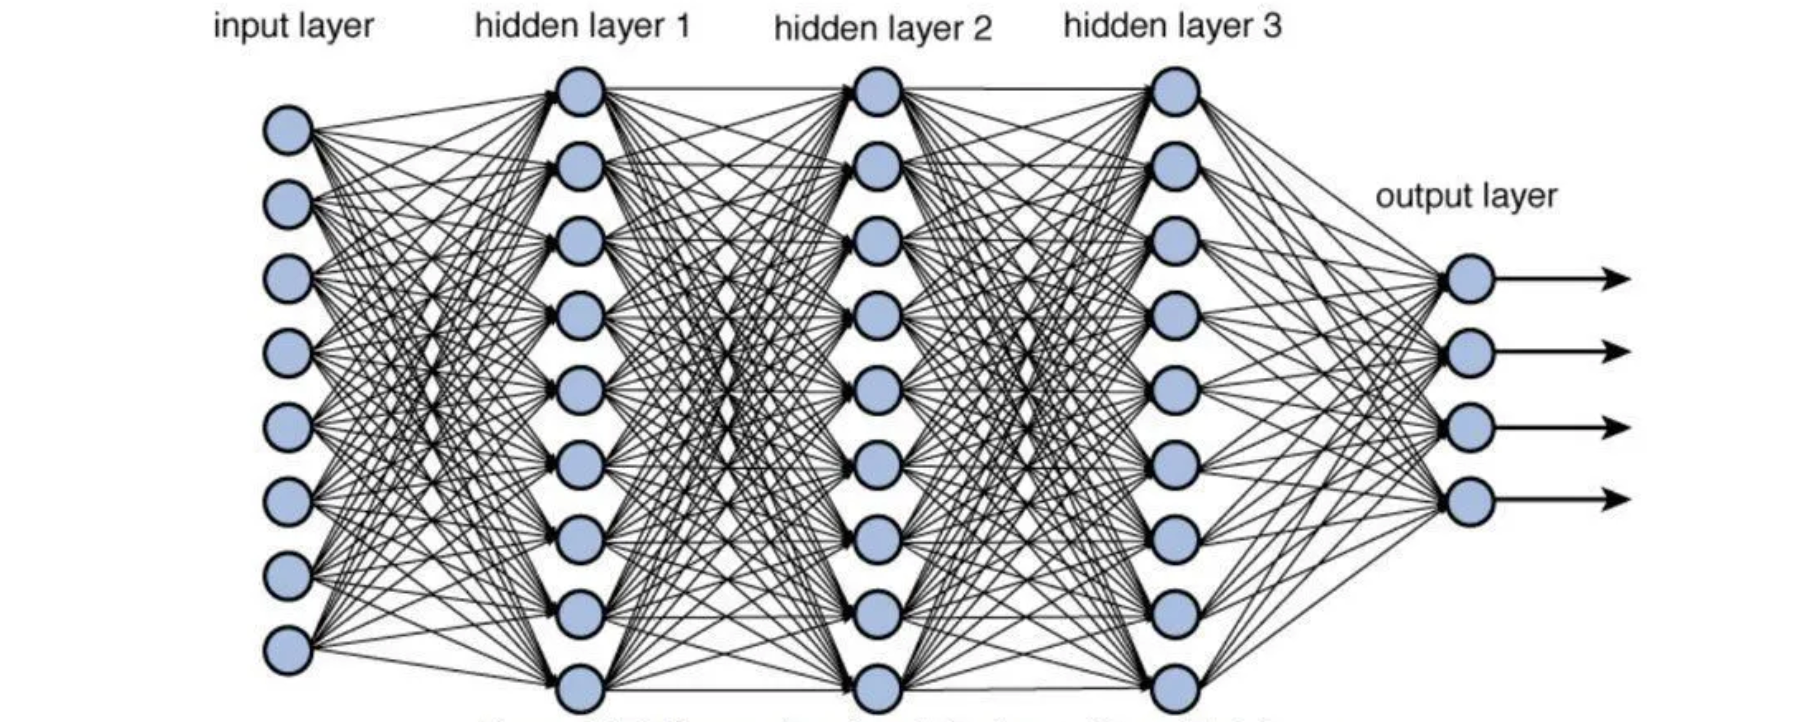

## HEMANT THAPA

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics as st
import random
import yfinance as yf
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Linear regression is a fundamental and widely used statistical technique in machine learning and deep learning. While it may not be considered a deep learning model itself, it serves as a foundational concept that underlies more complex neural network architectures.

At its core, linear regression is a supervised learning algorithm used for predicting a continuous output variable (also known as the dependent or target variable) based on one or more input features (independent variables). It assumes a linear relationship between the input features and the output variable.

### <font color='blue'> Mathematical Representation: 

In simple linear regression, you have a single input feature (X) and a single output variable (Y). The relationship between them is represented as Y = b0 + b1 * X

Y represents the output variable.

X represents the input feature.

b0 is the y-intercept (bias).

b1 is the slope (weight) of the linear relationship.

In [3]:
class stock:
    def __init__(self, ticker, period):
        self.ticker = ticker  
        self.period = period  
        
    def chart(self):
        # Download historical stock data using yfinance and return it
        return yf.download(self.ticker, period=self.period)

#class for plotting linear regression predictions
class Plot:
    def __init__(self, X ,y, y_pred):
        self.X = X          # Independent variables
        self.y = y          # Actual dependent variables
        self.y_pred = y_pred  # Predicted dependent variables
        
    def linear_predict(self):
        # Create a scatter plot of actual data points
        plt.figure(figsize=(8,6))
        plt.scatter(self.X, self.y, alpha=0.5)
        
        # Plot the linear regression predictions in red
        plt.plot(self.X, self.y_pred, color="red")
        plt.grid(True, linestyle="--", color="grey", alpha=0.5)
        plt.xlabel("Independent Variables")
        plt.ylabel("Dependent Variables")
        plt.show() 

In [4]:
# Define the time period for downloading financial data (5 years)
years = "5Y"

# Download historical data for the S&P 500 index (^GSPC) for the specified period
X = yf.download("^GSPC", period=years)

# Download historical data for Microsoft (MSFT) stock prices for the same period
y = yf.download("MSFT", period=years)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
#SNP500
X[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-03,2931.689941,2939.860107,2921.360107,2925.510010,2925.510010,3625510000
2018-10-04,2919.350098,2919.780029,2883.919922,2901.610107,2901.610107,3510370000
2018-10-05,2902.540039,2909.639893,2869.290039,2885.570068,2885.570068,3340820000
2018-10-08,2877.530029,2889.449951,2862.080078,2884.429932,2884.429932,3381820000
2018-10-09,2882.510010,2894.830078,2874.270020,2880.340088,2880.340088,3531690000


In [6]:
X_mean_value = np.mean(X.Close)
X_mode_value = X.Close.mode().values[0]  
X_median_value = np.median(X.Close)

In [7]:
print(f'Mean: {X_mean_value:.2f}')
print(f'Median: {X_median_value:.2f}')
print(f'Mode: {X_mode_value:.2f}')

Mean: 3669.07
Median: 3819.72
Mode: 2926.46


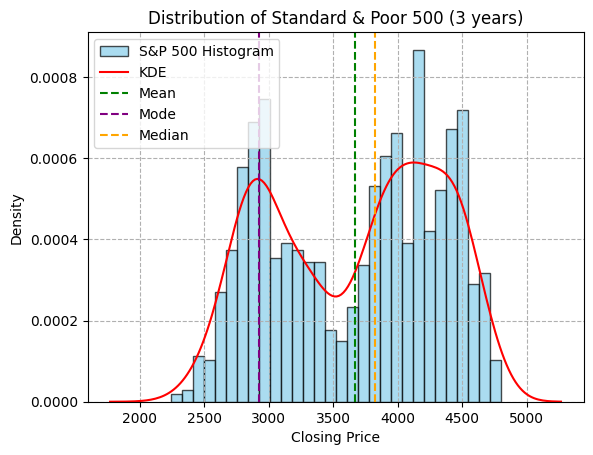

In [8]:
# Assuming X.Close is your data for the distribution plot
plt.hist(X.Close, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='S&P 500 Histogram')

# Overlay a KDE plot using Seaborn
sns.kdeplot(X.Close, color='red', label='KDE')
plt.axvline(X_mean_value, color='green', linestyle='--', label='Mean')
plt.axvline(X_mode_value, color='purple', linestyle='--', label='Mode')
plt.axvline(X_median_value, color='orange', linestyle='--', label='Median')
plt.xlabel("Closing Price")
plt.ylabel("Density")
plt.title("Distribution of Standard & Poor 500 (3 years)")
plt.grid(True, ls='--')
plt.legend()
plt.show()

In [9]:
y_mean_value = np.mean(y.Close)
y_mode_value = y.Close.mode().values[0]
y_median_value = np.median(y.Close)

In [10]:
print(f'Mean: {y_mean_value:.2f}')
print(f'Median: {y_median_value:.2f}')
print(f'Mode: {y_mode_value:.2f}')

Mean: 224.05
Median: 235.77
Mode: 102.80


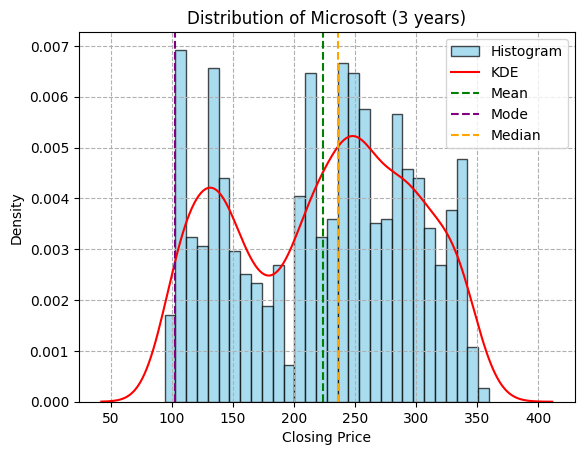

In [11]:
plt.hist(y.Close, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Histogram')
sns.kdeplot(y.Close, color='red', label='KDE')
mean_value = np.mean(y.Close)
mode_value = y.Close.mode().values[0] 
median_value = np.median(y.Close)
plt.axvline(y_mean_value, color='green', linestyle='--', label='Mean')
plt.axvline(y_mode_value, color='purple', linestyle='--', label='Mode')
plt.axvline(y_median_value, color='orange', linestyle='--', label='Median')
plt.xlabel("Closing Price")
plt.ylabel("Density")
plt.title("Distribution of Microsoft (3 years)")
plt.grid(True, ls='--')
plt.legend()
plt.show()

In [12]:
import scipy.stats as stats

In [13]:
#skewness for X.Close (Standard & Poor 500)
X_skewness = stats.skew(X.Close)

#skewness for y.Close (Microsoft)
y_skewness = stats.skew(y.Close)

print(f"Skewness for Standard & Poor 500 (X.Close): {X_skewness:.2f}")
print(f"Skewness for Microsoft (y.Close): {y_skewness:.2f}")

Skewness for Standard & Poor 500 (X.Close): -0.17
Skewness for Microsoft (y.Close): -0.16


#### Comparing Distribution Plot 

In [14]:
# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X.Close.values.reshape(-1, 1))

In [15]:
# Scale the data for the second plot (Microsoft)
scaled_y = scaler.fit_transform(y.Close.values.reshape(-1, 1))

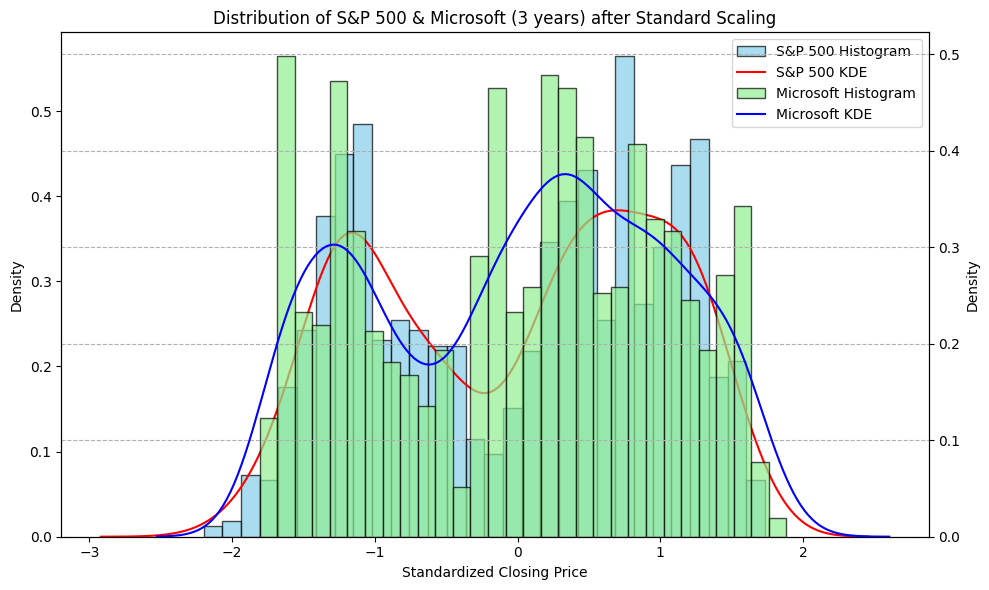

In [16]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.hist(scaled_X, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='S&P 500 Histogram')
sns.kdeplot(scaled_X[:, 0], color='red', label='S&P 500 KDE')
ax1.set_xlabel("Standardized Closing Price")
ax1.set_ylabel("Density")
ax1.set_title("Distribution of S&P 500 & Microsoft (3 years) after Standard Scaling")

ax2 = ax1.twinx()
ax2.hist(scaled_y, bins=30, density=True, alpha=0.7, color='lightgreen', edgecolor='black', label='Microsoft Histogram')
sns.kdeplot(scaled_y[:, 0], color='blue', label='Microsoft KDE')
ax2.set_ylabel("Density")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')
plt.tight_layout()
plt.grid(True, ls='--')
plt.show()

Our skewness do not get affected during featuring scaling. When we standardize data (subtract the mean and divide by the standard deviation), we are essentially linearly transforming the data. This transformation do not change the relative ordering of the data points. It only shifts and scales the data along the same distribution shape. Therefore, if your data had a positive or negative skewness before standardization, it will maintain the same skewness after standardization

 Linear transformations include addition, subtraction, multiplication, and division, all of which are involved in standardization.

In [17]:
# Skewness for X.Close (Standard & Poor 500)
X_scaled_skewness = stats.skew(scaled_X, axis=None)
# Skewness for y.Close (Microsoft)
y_scaled_skewness = stats.skew(scaled_y, axis=None)
print(f"Skewness for Standard & Poor 500 (X.Close): {X_scaled_skewness:.2f}")
print(f"Skewness for Microsoft (y.Close): {y_scaled_skewness:.2f}")

Skewness for Standard & Poor 500 (X.Close): -0.17
Skewness for Microsoft (y.Close): -0.16


Standard & Poor 500 has karl pearson skewness of -0.16  and Microsoft has -0.16, This means that the distribution of the dataset is slightly right-skewed (positively skewed). In a right-skewed distribution, the tail on the right side (toward larger values) is longer or more pronounced than the tail on the left side.

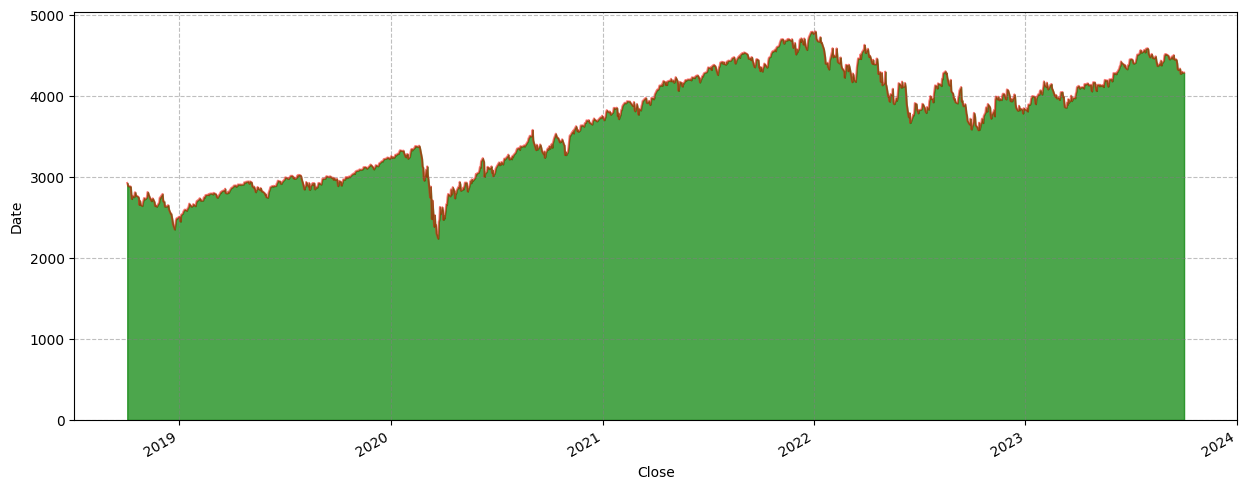

In [18]:
#Snp500 plot
plt.figure(figsize=(15,6))
X.Close.plot(color="red", alpha=0.5)
plt.stackplot(X.index, X.Close, alpha=0.7, color="green")
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.xlabel("Close")
plt.ylabel("Date")
plt.show()

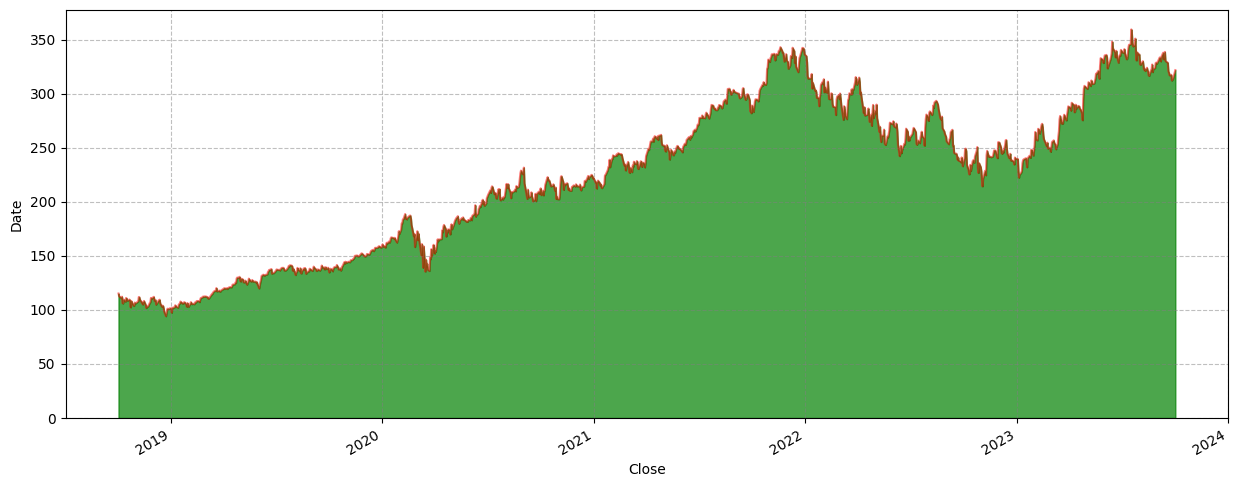

In [19]:
#microsoft plot
plt.figure(figsize=(15,6))
y.Close.plot(color="red", alpha=0.5)
plt.stackplot(y.index, y.Close, alpha=0.7, color="green")
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.xlabel("Close")
plt.ylabel("Date")
plt.show()

In [20]:
#creating data set, where X is snp500 and y is micrsoft
dataset = {"X":X.Close.values, "y":y.Close.values}

In [21]:
print(len(dataset['X']))
print(len(dataset['y']))

1257
1257


In [22]:
df = pd.DataFrame(dataset)

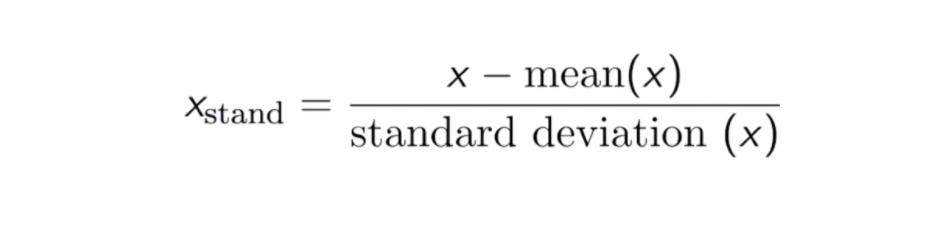

In [23]:
#standardisation
df_standard_scale = (df - df.mean()) / df.std()

In [24]:
df_standard_scale[:5]

,X,y
0,-1.142306,-1.513636
1,-1.179022,-1.546722
2,-1.203664,-1.555898
3,-1.205416,-1.573692
4,-1.211699,-1.554090


## STANDARD SCALER

StandardScaler, also known as Z-score normalization, transforms the data such that it has a mean (average) of 0 and a standard deviation of 1. This scaling technique is particularly useful when your data follows a Gaussian (normal) distribution. It subtracts the mean from each data point and divides by the standard deviation. The result is that the scaled data has a distribution with a mean of 0 and a standard deviation of 1.

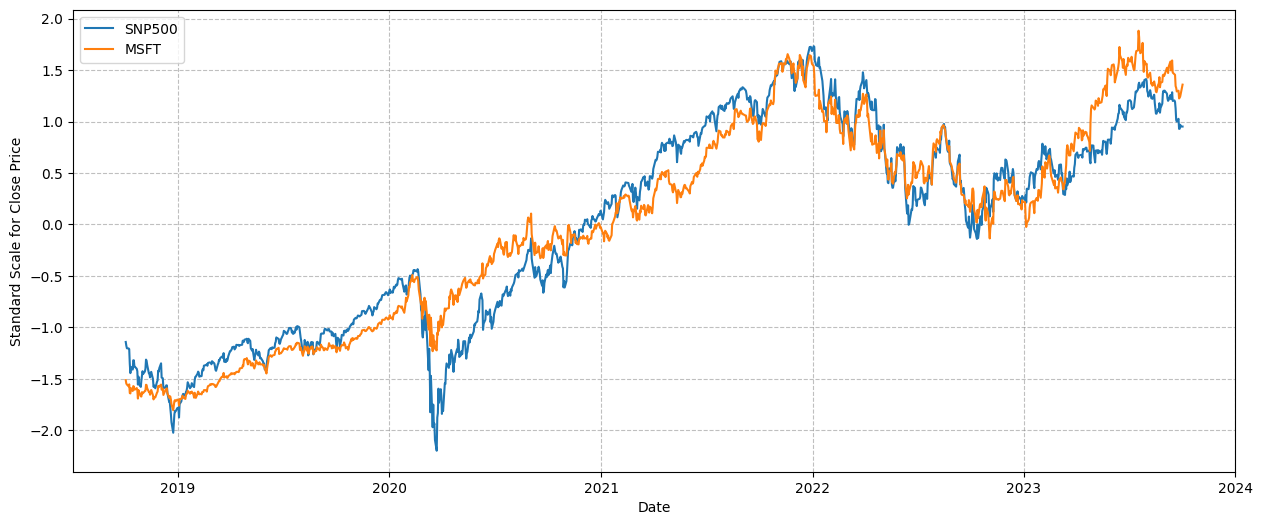

In [25]:
#plotting scaler values for time series analysis
plt.figure(figsize=(15,6))
plt.plot(X.index, df_standard_scale['X'], label="SNP500")
plt.plot(y.index, df_standard_scale['y'], label="MSFT")
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Standard Scale for Close Price")
plt.legend()
plt.show()

## MIN MAX SCALER

MinMaxScaler, on the other hand, scales the data to a specific range, typically between 0 and 1. It does this by subtracting the minimum value of the feature and then dividing by the range (the difference between the maximum and minimum values). The scaled data is constrained to the specified range.

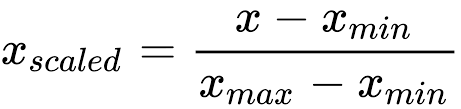

In [26]:
#Min Max scaler
data_mim_max_scaled = (df - df.min()) / (df.max() - df.min())

In [27]:
data_mim_max_scaled [:5]

,X,y
0,0.268881,0.079289
1,0.259542,0.070320
2,0.253275,0.067832
3,0.252829,0.063009
4,0.251231,0.068322


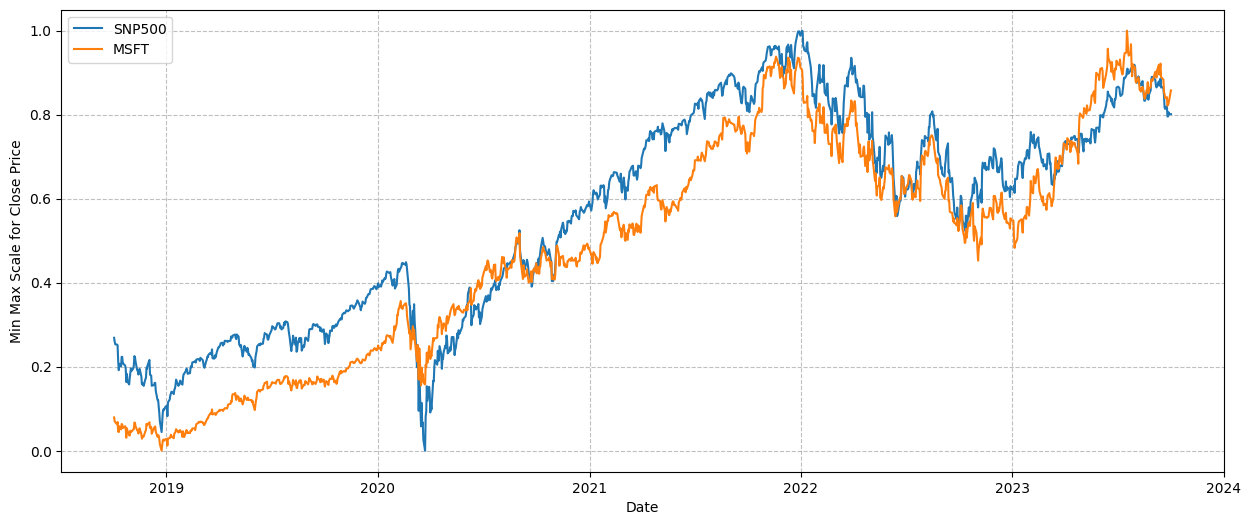

In [28]:
plt.figure(figsize=(15,6))
plt.plot(X.index, data_mim_max_scaled ['X'], label="SNP500")
plt.plot(y.index, data_mim_max_scaled ['y'], label="MSFT")
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Min Max Scale for Close Price")
plt.legend()
plt.show()

SNP500 and Microsoft are showing some types of similar pattern during time series analysis. 

## LINEAR REGRESSION

In [29]:
# Extract the 'X' column data from the DataFrame and convert it to a 2D NumPy array
X = df['X'].values.reshape(-1, 1)

# Extract the 'y' column data from the DataFrame and convert it to a 2D NumPy array
y = df['y'].values.reshape(-1, 1)

In [30]:
X.ndim

2

In [31]:
y.ndim

2

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=0)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# Create an instance of the LinearRegression model
model = LinearRegression()

In [35]:
#Training model
model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

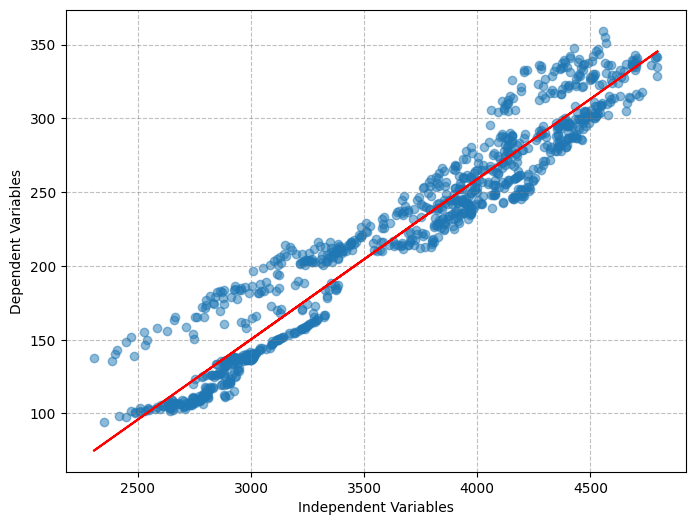

In [37]:
predictions = Plot(X_test, y_test, y_pred)
predictions.linear_predict()

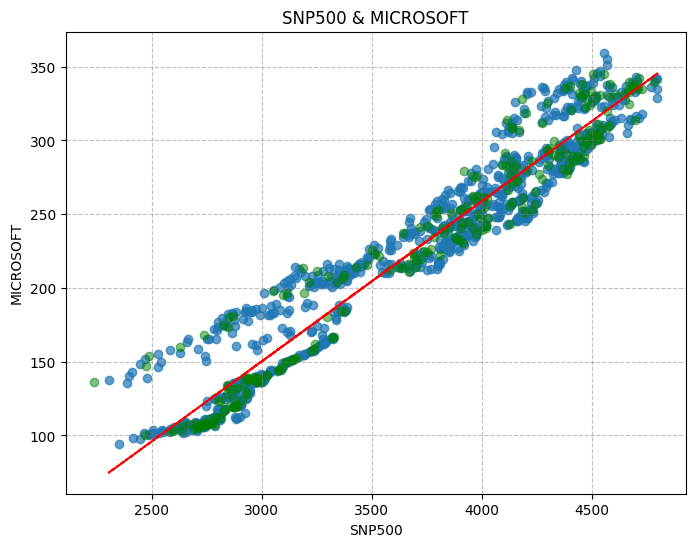

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, alpha = 0.7)
plt.scatter(X_train, y_train, color='green', alpha=0.5)
plt.plot(X_test, y_pred, color='red', ls='--')
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.xlabel("SNP500")
plt.ylabel("MICROSOFT")
plt.title('SNP500 & MICROSOFT')
plt.show() 

In [39]:
print("Number of coefficients:", len(model.coef_))

print("Estimated coefficients: {}".format(model.coef_[0][0]))

Number of coefficients: 1
Estimated coefficients: 0.10863628516698236


In [40]:
print("Estimated intercept: {}".format(model.intercept_[0]))

Estimated intercept: -175.6428502491371


#### R SQAURE

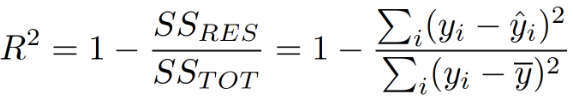

In [41]:
#Calcaulting R square
rsquare = r2_score(y_test, y_pred)

In [42]:
print(f'R Sqaure : {round(rsquare,4)}')

R Sqaure : 0.9238


#### MEAN ABSOLUTE ERROR

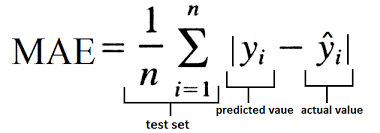

In [43]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

MAE: 15.76


### MEAN SQUARE ERROR

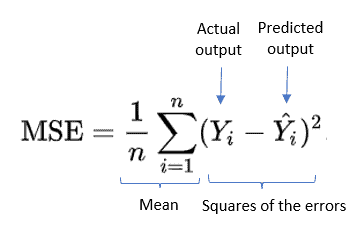

In [44]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

MSE: 382.33


### ROOT MEAN SQUARE

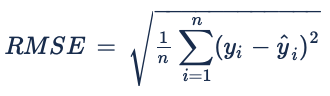

In [45]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 19.55


### CROSS VALIDATION

#### Cross Validation on Train set 

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores_five_fold = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

In [48]:
# The R-squared scores for each fold
for i, r2 in enumerate(cv_scores_five_fold, 1):
    print(f"Fold {i} R-squared Score: {r2:.4f}")

Fold 1 R-squared Score: 0.9428
Fold 2 R-squared Score: 0.9555
Fold 3 R-squared Score: 0.9409
Fold 4 R-squared Score: 0.8904
Fold 5 R-squared Score: 0.9508


In [49]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_five_fold).round(2)))

Average 5-Fold CV Score: 0.94


#### Cross Validation on Test set 

In [50]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores_five_fold = cross_val_score(model, X_test, y_test, cv=5, scoring='r2')

In [51]:
# The R-squared scores for each fold
for i, r2 in enumerate(cv_scores_five_fold, 1):
    print(f"Fold {i} R-squared Score: {r2:.4f}")

Fold 1 R-squared Score: 0.9246
Fold 2 R-squared Score: 0.9176
Fold 3 R-squared Score: 0.9401
Fold 4 R-squared Score: 0.9176
Fold 5 R-squared Score: 0.9153


In [52]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_five_fold).round(2)))

Average 5-Fold CV Score: 0.92


#### Evaluating Train & Test Performance 

In [53]:
# Evaluating training set performance
print("Training set score: {:.2}".format(model.score(X_train, y_train)))
# Evaluating test set performance
print("Test set score: {:.2}".format(model.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.92


## DEEP LEARNING MODEL

In [54]:
#Independent and Dependent Variable
X = df['X'].values.reshape(-1,1)
y = df['y'].values.reshape(-1,1)

In [55]:
# Split the dataset into three sets: training, validation, and testing

# Step 1: Split the original dataset into a temporary training set and a test set
X_train_temp, X_test_tf, y_train_temp, y_test_tf = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 2: Split the temporary training set into the final training set and a validation set
X_train_tf, X_val, y_train_tf, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=0)

# Now you have three sets:
# - X_train_tf and y_train_tf: The final training set used for model training.
# - X_val and y_val: The validation set used for tuning hyperparameters and monitoring model performance.
# - X_test_tf and y_test_tf: The test set used for evaluating the final model's performance.

In [56]:
scaler = StandardScaler()
scaler

StandardScaler()

In [57]:
X_train[:5]

array([[3915.45996094],
       [3957.62988281],
       [3719.04003906],
       [3635.40991211],
       [3243.62988281]])

In [58]:
X_test[:5]

array([[2785.67993164],
       [3281.06005859],
       [2546.15991211],
       [3955.        ],
       [2973.01000977]])

In [59]:
# Scale the input features for all three sets (training, validation, and testing)

# Step 1: Scale the features in the final training set
X_train_scaled = scaler.fit_transform(X_train_tf.reshape(-1, 1))

# Step 2: Scale the features in the validation set using the same scaler
X_val_scaled = scaler.transform(X_val.reshape(-1, 1))

# Step 3: Scale the features in the test set using the same scaler
X_test_scaled = scaler.transform(X_test_tf.reshape(-1, 1))

# Scaling is important to ensure that all input features have similar scales,
# which can help improve the performance of machine learning models.
# The `fit_transform` method is used to fit the scaler to the training data and
# then transform both the training and validation/test data based on the scaling
# parameters learned from the training data.

In [60]:
# Defining a Sequential Keras model
# Create a Sequential model object
model = Sequential([
    #Add a Dense layer to the model
    Dense(units=1,        # Number of output units (1 for regression)
          input_shape=(1,),  # Input shape (1 feature)
          activation='linear',  # Linear activation for regression
          use_bias=True)       # Use bias terms in the layer
])

#Compile the model
model.compile(
    optimizer='sgd',          # Stochastic Gradient Descent optimizer
    loss='mean_squared_error'  # Mean Squared Error loss function for regression
)

# The defined model is a simple linear regression model with one input feature,
# one output unit, and linear activation. It uses stochastic gradient descent (SGD)
# as the optimizer and mean squared error (MSE) as the loss function for training.

In [61]:
# Train the Keras model
history = model.fit(
    X_train_scaled,          # Training features (scaled)
    y_train_tf,              # Training target
    validation_data=(X_val_scaled, y_val),  # Validation data
    epochs=100,              # Number of training epochs
    verbose=0                # Set to 0 for no training progress output
)

# The `fit` method trains the Keras model using the specified training data
# (features and target) for a specified number of training epochs. It also
# uses the validation data to monitor the model's performance during training.
# Setting `verbose` to 0 suppresses training progress output.

In [62]:
# Make predictions using the trained Keras model
y_pred_tf = model.predict(X_train_scaled)
y_pred_tf[:5]

26/26 [==============================] - 0s 2ms/step


array([[134.91992],
       [300.948  ],
       [234.00609],
       [270.21387],
       [307.06717]], dtype=float32)

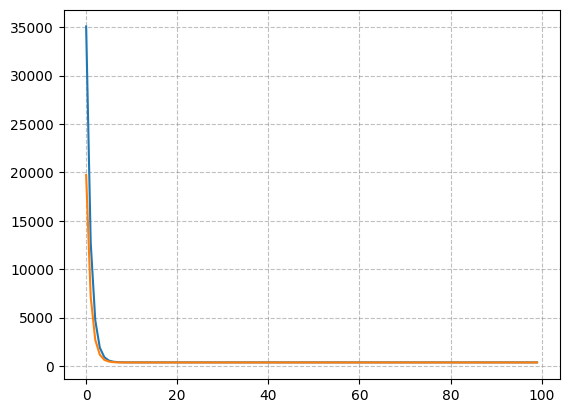

In [63]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid(True, linestyle="--", color="grey", alpha=0.5)

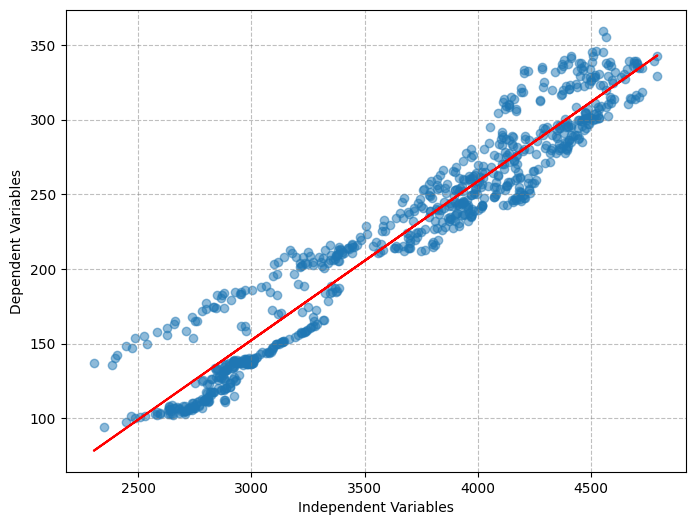

In [64]:
#plotting best fit line
predictions_tf = Plot(X_train_tf,y_train_tf, y_pred_tf)
predictions_tf.linear_predict()

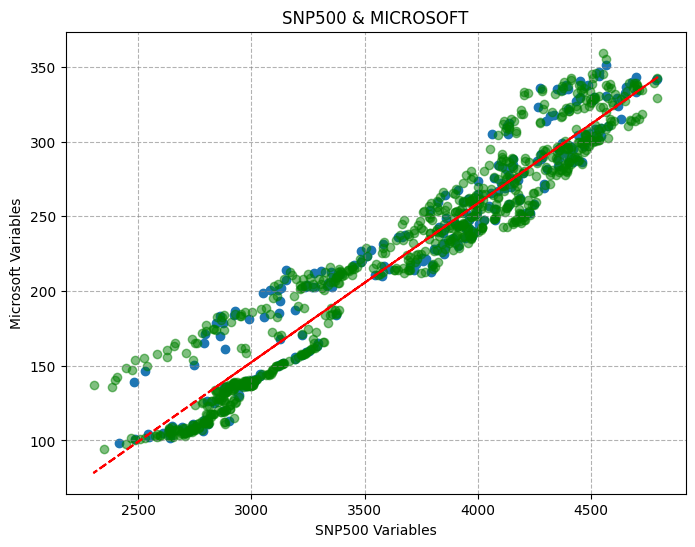

In [65]:
#plotting best fit line
#plottinf scatter plot of training and test set
plt.figure(figsize=(8,6))
plt.scatter(X_test_tf, y_test_tf)
plt.scatter(X_train_tf, y_train_tf, color='green', alpha=0.5)
plt.plot(X_train_tf, y_pred_tf, color='red', ls='--')
plt.grid(True, linestyle="--", color="grey", alpha=0.6)
plt.xlabel("SNP500 Variables")
plt.ylabel("Microsoft Variables")
plt.title('SNP500 & MICROSOFT')
plt.show() 

In [66]:
#calculating R sqaure
rsquare = r2_score(y_train_tf, y_pred_tf)

In [67]:
print(f"R Square: {rsquare}")

R Square: 0.927761460983126


In [68]:
# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train_tf, y_pred_tf)
print(f"MAE: {mae:.2f}")

MAE: 15.86


In [69]:
# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_train_tf, y_pred_tf)
print(f"MSE: {mse:.2f}")

MSE: 374.07


In [70]:
# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 19.34


#### KFOLD CROSS VALIDATION WITH FIVE FOLDS

In [71]:
X = (X - X.mean())/X.std()
y = (y - y.mean())/y.std()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=0)

In [72]:
from sklearn.model_selection import KFold

In [73]:
def r_squared(y_true, y_pred):
    # Calculating the sum of squared residuals (SSR)
    ssr = np.sum((y_true - y_pred) ** 2)
    # Calculating the total sum of squares (SST)
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    # Calculating R-squared as 1 - (SSR / SST)
    r_squared = 1 - (ssr / sst)
    # Return the R-squared value
    return r_squared

In [74]:
#a list to store R-squared scores
r2_scores = []

#the number of folds
n_splits = 5
kf = KFold(n_splits=n_splits)

In [75]:
# Perform k-fold cross-validation
for train_indices, val_indices in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_indices], X_train[val_indices]
    y_train_fold, y_val_fold = y_train[train_indices], y_train[val_indices]

    # Create a new model for each fold
    model = Sequential([
        Dense(units=1, input_shape=(1,), activation='linear', use_bias=True)
    ])
    model.compile(optimizer='sgd', loss='mean_squared_error')
    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold, epochs=100, verbose=0)
    # Make predictions on the validation fold
    y_pred = model.predict(X_val_fold)
    #  R-squared for this fold
    r2 = r_squared(y_val_fold, y_pred)
    r2_scores.append(r2)

2/2 [==============================] - 0s 182us/step


In [76]:
#R-squared scores for each fold
for i, r2 in enumerate(r2_scores):
    print(f"Fold {i + 1} R-squared: {r2}")

Fold 1 R-squared: 0.9429878144565188
Fold 2 R-squared: 0.95567365905003
Fold 3 R-squared: 0.9410191819839787
Fold 4 R-squared: 0.8896397056063898
Fold 5 R-squared: 0.9511384802912068


In [77]:
# Mean R-squared score
mean_r2 = np.mean(r2_scores)
print(f"Mean R-squared: {mean_r2}")

Mean R-squared: 0.9360917682776249


#### KFOLD CROSS VALIDATION WITH TEN FOLDS

In [78]:
# Define the number of folds
n_splits = 10 
kf = KFold(n_splits=n_splits)

In [ ]:
#list to store R-squared scores
r2_scores = []

# Perform 10-fold cross-validation
for train_indices, val_indices in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_indices], X_train[val_indices]
    y_train_fold, y_val_fold = y_train[train_indices], y_train[val_indices]

    # Create a new model for each fold
    model = Sequential([
        Dense(units=1, input_shape=(1,), activation='linear', use_bias=True)
    ])
    model.compile(optimizer='sgd', loss='mean_squared_error')
    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold, epochs=100, verbose=0)
    # Make predictions on the validation fold
    y_pred = model.predict(X_val_fold)
    # Calculate R-squared for this fold
    r2 = r_squared(y_val_fold, y_pred)
    r2_scores.append(r2)

1/1 [==============================] - 0s 88ms/step


In [ ]:
#R-squared scores for each fold
for i, r2 in enumerate(r2_scores):
    print(f"Fold {i + 1} R-squared: {r2}")

In [ ]:
# mean R-squared score
mean_r2 = np.mean(r2_scores)
print(f"Mean R-squared: {mean_r2}")

## MANUAL CALCULATION 

In [ ]:
df[:5]

In [ ]:
# new column 'XY' by multiplying values in columns 'X' and 'y'
df['XY'] = df['X'] * df['y']
# the mean of the 'X' column
X_mean = sum(df['X']) / len(df['X'])
# the mean of the 'y' column
y_mean = sum(df['y']) / len(df['y'])
#  new column 'X square' by squaring values in the 'X' column
df['X square'] = df['X']**2
# new column 'y_square' by squaring values in the 'y' column
df['y_square'] = df['y']**2

In [ ]:
X_mean

In [ ]:
y_mean

In [ ]:
# Calculating the deviation of each 'X' value from its mean
df['Xi - X mean'] = df['X'] - X_mean
# Calculating the deviation of each 'y' value from its mean
df['yi - y mean'] = df['y'] - y_mean
# Calculating the product of the deviations of 'X' and 'y' from their respective means
df['(Xi - X mean)(yi - y mean)'] = df['Xi - X mean'] * df['yi - y mean']
# Calculating the square of the deviation of 'X' from its mean
df['(Xi - X mean)**2'] = df['Xi - X mean'] * df['Xi - X mean']

In [ ]:
df[:5]

In [ ]:
# Calculating the coefficient b1 using the formula for simple linear regression
b1 = sum(df['(Xi - X mean)(yi - y mean)']) / sum(df['(Xi - X mean)**2'])
print(f'Coefficient: {round(b1,4)}')

In [ ]:
# Calculatin the intercept bo using the formula for simple linear regression
bo = y_mean - b1 * X_mean
print(f'Intercept: {round(bo,4)}')

In [ ]:
# Extracting the values from the 'X' column in the DataFrame
X_value = df['X']
# Converting the extracted values to a list
X_value = X_value.tolist()

In [ ]:
#empty list to store the predicted values
predicted_values = []

# predicted values for each X_value
for i in X_value:
    y = bo + b1 * i
    predicted_values.append(y)

In [ ]:
# 'y_pred' to the DataFrame and assign it the predicted values
df['y_pred'] = predicted_values

In [ ]:
# 'residual' to the DataFrame and calculating residuals
df['residual'] = df['y'] - df['y_pred']

In [ ]:
df[:5]

## SST

In [ ]:
#  mean of 'y'
y_mean = sum(df['y']) / len(df['y'])
# mean of 'X'
X_mean = sum(df['X']) / len(df['X'])
#  Total Sum of Squares (SST)
sst = sum([(y - y_mean)**2 for y in df['y']])
#  SST value
print(f'Total Sum of Square (SST): {sst}')

## SSE

In [ ]:
# Sum of Squares of Residuals (SSE)
sse = sum((df['residual'])**2)
# SSE value
print(f'Sum of Square Residual Error (SSE): {sse}')

## SSR

In [ ]:
# the squared differences between predicted 'y' values and the mean of 'y'
df['(y_pred - y_mean)**2'] = (df['y_pred'] - y_mean)**2
# Total Sum of Squares of Regression (SSR)
ssr = sum(df['(y_pred - y_mean)**2'])
# SSR value
print(f'Total Sum of Square Regression (SSR): {ssr}')

## R SQUARE 

In [ ]:
#R-squared (coefficient of determination)
r_square = ssr/sst
f"R square: {r_square}"

In [ ]:
#R-squared (coefficient of determination) using an alternative formula
r_square = 1 - sse/sst
f"R square: {r_square}"

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(df['X'], df['y'], alpha=0.5)
plt.plot(df['X'], df['y_pred'], color="red")
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.xlabel("SNP500", fontsize=12)
plt.ylabel("MSFT", fontsize=12)
plt.show()

## BUILDING NEURAL NETWORK

In [ ]:
# Define the time period for downloading financial data (5 years)
years = "5Y"

# Download historical data for the S&P 500 index (^GSPC) for the specified period
X = yf.download("^GSPC", period=years)

# Download historical data for Microsoft (MSFT) stock prices for the same period
y = yf.download("MSFT", period=years)

In [ ]:
X[:5]

In [ ]:
y[:5]

In [ ]:
# Select the "Close" column from the S&P 500 index data and convert it to a NumPy array
X = X["Close"].to_numpy()
# Reshape the S&P 500 data to a 2D array with a single column
X = X.reshape(-1, 1)
# Select the "Close" column from the Microsoft (MSFT) stock price data and convert it to a NumPy array
y = y["Close"].to_numpy()
# Reshape the Microsoft data to a 2D array with a single column
y = y.reshape(-1, 1)

In [ ]:
#standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [ ]:
# Split the data into a temporary training set (X_train_temp and y_train_temp) and a test set (X_test and y_test)
# The test set size is 20% of the entire dataset, and no random seed (random_state) is specified.
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further split the temporary training set into a training set (X_train and y_train)
# and a validation set (X_val and y_val)
# The validation set size is 20% of the temporary training set, and no random seed (random_state) is specified.
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=0)

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases with small random values
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))
        
        self.loss_history = []  

    def forward(self, input_data):
        # Hidden layer
        self.hidden_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.hidden_input 
        
        # Output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.output_input  

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def backward(self, input_data, target, learning_rate):
        error = target - self.output
        
        # Derivatives for the output layer
        delta_output = -error
        d_weights_hidden_output = np.dot(self.hidden_output.T, delta_output)
        d_bias_output = np.sum(delta_output, axis=0, keepdims=True)
        
        # Derivatives for the hidden layer
        delta_hidden = delta_output.dot(self.weights_hidden_output.T)
        d_weights_input_hidden = np.dot(input_data.T, delta_hidden)
        d_bias_hidden = np.sum(delta_hidden, axis=0, keepdims=True)

        # Update weights and biases
        self.weights_hidden_output -= d_weights_hidden_output * learning_rate
        self.bias_output -= d_bias_output * learning_rate
        self.weights_input_hidden -= d_weights_input_hidden * learning_rate
        self.bias_hidden -= d_bias_hidden * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.forward(X)
            loss = self.mean_squared_error(y, self.output)
            self.backward(X, y, learning_rate)
            
            self.loss_history.append(loss)  

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
                
    def r_squared(self, y_true, y_pred):
         # Sum of squared residuals
        ssr = np.sum((y_true - y_pred) ** 2) 
        # Total sum of squares
        sst = np.sum((y_true - np.mean(y_true)) ** 2)  
        return 1 - (ssr / sst)

    def predict(self, X):
        self.forward(X)
        return self.output

In [ ]:
# size of the input layer
input_size = 1
# size of the hidden layer
hidden_size = 1
# size of the output layer
output_size = 1
# learning rate for the neural network's optimizer 
learning_rate = 0.001
# number of training epochs (iterations) for training the neural network
epochs = 25

In [ ]:
#an instance of the NeuralNetwork class with the specified hyperparameters
model = NeuralNetwork(input_size, hidden_size, output_size)
# Train the model using the training data with the specified number of epochs and learning rate
model.train(X_train, y_train, epochs, learning_rate)

In [ ]:
# trained model to make predictions on the training data
y_pred = model.predict(X_train)
print(y_pred[:5])

In [ ]:
#best fit line
plt.scatter(X_train, y_train, label="Training Data")
plt.plot(X_train, y_pred, color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Plot the loss over training epochs
plt.plot(range(epochs), model.loss_history, linestyle='-', color='b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.grid()
plt.show()

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
r2_train = model.r_squared(y_train, y_pred)
print(f"R-squared (Training): {r2_train:.4f}")

# Predict on the validation data
y_pred_val = model.predict(X_val)

# Calculate R-squared for the validation data
r2_val = model.r_squared(y_val, y_pred_val)
print(f"R-squared (Validation): {r2_val:.4f}")

## REFERENCES:
    
Neural Networks: Forward Pass and Backpropagation
URL: https://towardsdatascience.com/neural-networks-forward-pass-and-backpropagation-be3b75a1cfcc

Everything You Need to Know About Activation Functions in Deep Learning Models
URL: https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253